<a href="https://colab.research.google.com/github/joaogabrielanuto/quant-traders/blob/under-construction/detector-topos-fundos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://tradingcomdados.com/images/logotipo/logotipo-trading-com-dados.svg" width="300" align="left"/>

---
# **Screening de abertura com Python** 


#### Varrendo em segundos quais ativos atendem aos critérios pré estabelecidos
---

# 1. Bibliotecas

In [1]:
# Manipulação de dados e série temporais
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, time
import pytz
from time import sleep

# Fonte de dados ativos
import MetaTrader5 as mt5

# Visualização dos dados
import mplfinance as mpf

# 2. Exploração do código

## 2.1. Obtenção das cotações

In [2]:
mt5.initialize()

True

In [3]:
timezone = pytz.timezone("America/Sao_Paulo")
data_inicio = datetime.now() - timedelta(days=5)
data_fim = datetime.now()

In [4]:
tickers = ['ABEV3', 'ALPA4', 'ALSO3', 'ARZZ3', 'ASAI3', 'AZUL4', 'B3SA3', 'BBAS3', 'BBDC3', 'BBDC4',
            'BBSE3', 'BEEF3', 'BPAC11', 'BRAP4', 'BRFS3', 'BRKM5', 'CASH3', 'CCRO3', 'CIEL3', 'CMIG4',
            'CMIN3', 'COGN3', 'CPFE3', 'CPLE6', 'CRFB3', 'CSAN3', 'CSNA3', 'CVCB3', 'CYRE3', 'DXCO3',
            'EGIE3', 'ELET3', 'ELET6', 'EMBR3', 'ENBR3', 'ENEV3', 'ENGI11', 'EQTL3', 'EZTC3', 'FLRY3',
            'GGBR4', 'GOAU4', 'GOLL4', 'HAPV3', 'HYPE3', 'IGTI11', 'IRBR3', 'ITSA4', 'ITUB4', 'JBSS3',
            'KLBN11', 'LREN3', 'LWSA3', 'MGLU3', 'MRFG3', 'MRVE3', 'MULT3', 'NTCO3', 'PCAR3', 'PETR3',
            'PETR4', 'PETZ3', 'PRIO3', 'RADL3', 'RAIL3', 'RAIZ4', 'RDOR3', 'RENT3', 'RRRP3', 'SANB11',
            'SBSP3', 'SLCE3', 'SMTO3', 'SOMA3', 'SUZB3', 'TAEE11', 'TIMS3', 'TOTS3', 'UGPA3', 'USIM5',
            'VALE3', 'VBBR3', 'VIIA3', 'VIVT3', 'WEGE3', 'YDUQ3']

In [5]:
ls_dados_ohlc = []
indice_ticker = 0

for i in tickers:
    dados_ohlc = mt5.copy_rates_range(i, mt5.TIMEFRAME_M5, data_inicio, data_fim)
    dados_ohlc = pd.DataFrame(dados_ohlc)
    dados_ohlc['ticker'] = str(i)
    dados_ohlc['indice_ticker'] = indice_ticker
    indice_ticker += 1
    dados_ohlc.index = pd.to_datetime(dados_ohlc['time'], unit='s')
    dados_ohlc = dados_ohlc.drop('time', axis=1)

    ls_dados_ohlc.append(dados_ohlc)

In [7]:
ls_dados_ohlc[0]

,open,high,low,close,tick_volume,spread,real_volume,ticker,indice_ticker
time,,,,,,,,,
2023-05-08 10:00:00,14.57,14.64,14.55,14.56,138,1,168300,ABEV3,0
2023-05-08 10:05:00,14.58,14.59,14.49,14.51,153,1,105900,ABEV3,0
2023-05-08 10:10:00,14.50,14.53,14.48,14.50,208,1,113200,ABEV3,0
2023-05-08 10:15:00,14.51,14.54,14.46,14.48,208,1,92000,ABEV3,0
2023-05-08 10:20:00,14.47,14.56,14.46,14.52,371,1,157700,ABEV3,0
...,...,...,...,...,...,...,...,...,...
2023-05-11 16:30:00,14.49,14.51,14.48,14.49,678,1,286200,ABEV3,0
2023-05-11 16:35:00,14.49,14.51,14.49,14.49,457,1,160800,ABEV3,0
2023-05-11 16:40:00,14.49,14.51,14.48,14.49,482,1,218700,ABEV3,0


In [8]:
list(enumerate(tickers))

[(0, 'ABEV3'),
 (1, 'ALPA4'),
 (2, 'ALSO3'),
 (3, 'ARZZ3'),
 (4, 'ASAI3'),
 (5, 'AZUL4'),
 (6, 'B3SA3'),
 (7, 'BBAS3'),
 (8, 'BBDC3'),
 (9, 'BBDC4'),
 (10, 'BBSE3'),
 (11, 'BEEF3'),
 (12, 'BPAC11'),
 (13, 'BRAP4'),
 (14, 'BRFS3'),
 (15, 'BRKM5'),
 (16, 'CASH3'),
 (17, 'CCRO3'),
 (18, 'CIEL3'),
 (19, 'CMIG4'),
 (20, 'CMIN3'),
 (21, 'COGN3'),
 (22, 'CPFE3'),
 (23, 'CPLE6'),
 (24, 'CRFB3'),
 (25, 'CSAN3'),
 (26, 'CSNA3'),
 (27, 'CVCB3'),
 (28, 'CYRE3'),
 (29, 'DXCO3'),
 (30, 'EGIE3'),
 (31, 'ELET3'),
 (32, 'ELET6'),
 (33, 'EMBR3'),
 (34, 'ENBR3'),
 (35, 'ENEV3'),
 (36, 'ENGI11'),
 (37, 'EQTL3'),
 (38, 'EZTC3'),
 (39, 'FLRY3'),
 (40, 'GGBR4'),
 (41, 'GOAU4'),
 (42, 'GOLL4'),
 (43, 'HAPV3'),
 (44, 'HYPE3'),
 (45, 'IGTI11'),
 (46, 'IRBR3'),
 (47, 'ITSA4'),
 (48, 'ITUB4'),
 (49, 'JBSS3'),
 (50, 'KLBN11'),
 (51, 'LREN3'),
 (52, 'LWSA3'),
 (53, 'MGLU3'),
 (54, 'MRFG3'),
 (55, 'MRVE3'),
 (56, 'MULT3'),
 (57, 'NTCO3'),
 (58, 'PCAR3'),
 (59, 'PETR3'),
 (60, 'PETR4'),
 (61, 'PETZ3'),
 (62, 'PRIO3')

# 3. Construção das funções

**Produzindo um loop**

In [9]:
for df in ls_dados_ohlc:
    df['mm_rapida'] = df.close.rolling(20).mean()
    df['mm_lenta'] = df.close.rolling(200).mean()

In [10]:
ls_dados_ohlc[0]

,open,high,low,close,tick_volume,spread,real_volume,ticker,indice_ticker,mm_rapida,mm_lenta
time,,,,,,,,,,,
2023-05-08 10:00:00,14.57,14.64,14.55,14.56,138,1,168300,ABEV3,0,NaN,NaN
2023-05-08 10:05:00,14.58,14.59,14.49,14.51,153,1,105900,ABEV3,0,NaN,NaN
2023-05-08 10:10:00,14.50,14.53,14.48,14.50,208,1,113200,ABEV3,0,NaN,NaN
2023-05-08 10:15:00,14.51,14.54,14.46,14.48,208,1,92000,ABEV3,0,NaN,NaN
2023-05-08 10:20:00,14.47,14.56,14.46,14.52,371,1,157700,ABEV3,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-11 16:30:00,14.49,14.51,14.48,14.49,678,1,286200,ABEV3,0,14.5060,14.45160
2023-05-11 16:35:00,14.49,14.51,14.49,14.49,457,1,160800,ABEV3,0,14.5055,14.45155
2023-05-11 16:40:00,14.49,14.51,14.48,14.49,482,1,218700,ABEV3,0,14.5045,14.45150


**Função médias móveis**

In [11]:
def medias_moveis(df, mm_rapida=20, mm_lenta=200):

    df['mm_rapida'] = df.close.rolling(mm_rapida).mean()
    df['mm_lenta'] = df.close.rolling(mm_lenta).mean()
    df = df.dropna()

    return df

In [12]:
medias_moveis(ls_dados_ohlc[0])

,open,high,low,close,tick_volume,spread,real_volume,ticker,indice_ticker,mm_rapida,mm_lenta
time,,,,,,,,,,,
2023-05-10 12:45:00,14.39,14.40,14.37,14.38,213,1,72700,ABEV3,0,14.3785,14.48115
2023-05-10 12:50:00,14.38,14.38,14.36,14.37,260,1,153800,ABEV3,0,14.3790,14.48020
2023-05-10 12:55:00,14.36,14.37,14.35,14.37,174,1,36500,ABEV3,0,14.3790,14.47950
2023-05-10 13:00:00,14.36,14.37,14.32,14.35,256,1,486700,ABEV3,0,14.3770,14.47875
2023-05-10 13:05:00,14.34,14.35,14.31,14.32,281,1,269500,ABEV3,0,14.3755,14.47795
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-11 16:30:00,14.49,14.51,14.48,14.49,678,1,286200,ABEV3,0,14.5060,14.45160
2023-05-11 16:35:00,14.49,14.51,14.49,14.49,457,1,160800,ABEV3,0,14.5055,14.45155
2023-05-11 16:40:00,14.49,14.51,14.48,14.49,482,1,218700,ABEV3,0,14.5045,14.45150


**Função condições do screening**

In [13]:
df.index[-1].date()

datetime.date(2023, 5, 11)

In [14]:
str(df.index[-1].date())

'2023-05-11'

In [15]:
ls_dados_ohlc[0].open[-1]

14.48

In [16]:
ls_dados_ohlc[0]['mm_rapida'][-1]

14.501500000000002

In [17]:
def screnning_abertura(df):

    cond1 = df['mm_rapida'][-1] > df['mm_lenta'][-1]
    cond2 = df['open'][-1] > df['mm_rapida'][-1]

    return (cond1 and cond2)

In [18]:
for df in ls_dados_ohlc:

    medias_moveis(df)
    
    if screnning_abertura(df):
        print(df.indice_ticker[-1], df.ticker[-1])

2 ALSO3
4 ASAI3
5 AZUL4
6 B3SA3
7 BBAS3
8 BBDC3
10 BBSE3
12 BPAC11
19 CMIG4
21 COGN3
22 CPFE3
25 CSAN3
27 CVCB3
31 ELET3
33 EMBR3
36 ENGI11
37 EQTL3
39 FLRY3
42 GOLL4
43 HAPV3
47 ITSA4
52 LWSA3
55 MRVE3
56 MULT3
57 NTCO3
59 PETR3
60 PETR4
64 RAIL3
65 RAIZ4
66 RDOR3
69 SANB11
72 SMTO3
73 SOMA3
76 TIMS3
85 YDUQ3


**Visualização dos ativos**

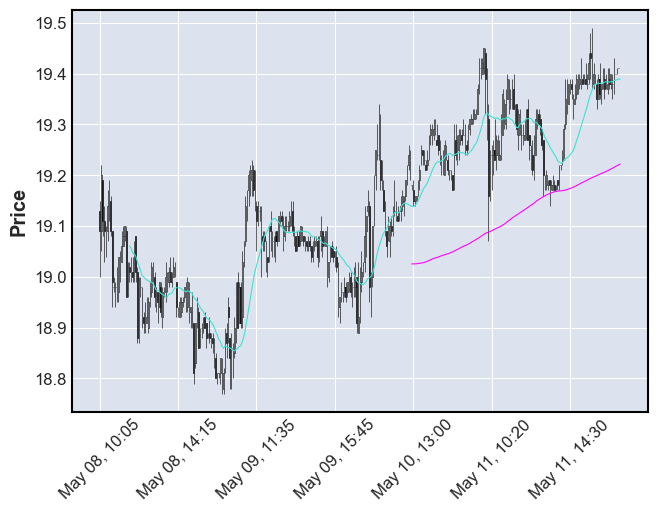

In [20]:
i = 2

mpf.plot(ls_dados_ohlc[i], type='candle', mav=(20, 200))

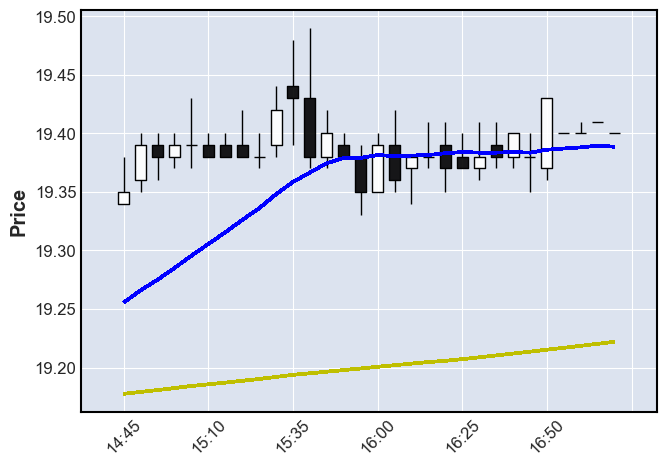

In [21]:
i = 2

mm_rapida_plot = list(ls_dados_ohlc[i][['mm_rapida']].itertuples(index=True))
mm_lenta_plot = list(ls_dados_ohlc[i][['mm_lenta']].itertuples(index=True))

df_figure = ls_dados_ohlc[i].iloc[-30:]
mm_rapida_plot = mm_rapida_plot[-30:]
mm_lenta_plot = mm_lenta_plot[-30:]

mpf.plot(df_figure, type='candle', alines=dict(alines=[mm_rapida_plot, mm_lenta_plot],colors=['b','y']))

**Incluir a data na função screening**

In [22]:
df.index[-1].date()

datetime.date(2023, 5, 11)

In [23]:
str(df.index[-1].date())

'2023-05-11'

In [32]:
data_hoje = str(datetime.now().date())
data_hoje

'2023-05-12'

In [33]:
def ativo_ja_abriu(df, data):

    cond1 = str(df.index[-1].date())==data

    return cond1

In [29]:
data_ontem = str( datetime.now().date() - timedelta(days=1))
data_hoje = str(datetime.now().date())
data_hoje = '2023-05-12'

for df in ls_dados_ohlc:

    medias_moveis(df)
    
    if screnning_abertura(df, data_ontem):
        print(df.indice_ticker[0], df.ticker[0])

2 ALSO3
4 ASAI3
5 AZUL4
6 B3SA3
7 BBAS3
8 BBDC3
10 BBSE3
12 BPAC11
19 CMIG4
21 COGN3
22 CPFE3
25 CSAN3
27 CVCB3
31 ELET3
33 EMBR3
36 ENGI11
37 EQTL3
39 FLRY3
42 GOLL4
43 HAPV3
47 ITSA4
52 LWSA3
55 MRVE3
56 MULT3
57 NTCO3
59 PETR3
60 PETR4
64 RAIL3
65 RAIZ4
66 RDOR3
69 SANB11
72 SMTO3
73 SOMA3
76 TIMS3
85 YDUQ3


# 4. Screnning abertura

In [64]:
mt5.initialize()

timezone = pytz.timezone("America/Sao_Paulo")
data_inicio = datetime.now() - timedelta(days=1)
data_fim = datetime.now()

tickers = ['ABEV3', 'ALPA4', 'ALSO3', 'ARZZ3', 'ASAI3', 'AZUL4', 'B3SA3', 'BBAS3', 'BBDC3', 'BBDC4',
            'BBSE3', 'BEEF3', 'BPAC11', 'BRAP4', 'BRFS3', 'BRKM5', 'CASH3', 'CCRO3', 'CIEL3', 'CMIG4',
            'CMIN3', 'COGN3', 'CPFE3', 'CPLE6', 'CRFB3', 'CSAN3', 'CSNA3', 'CVCB3', 'CYRE3', 'DXCO3',
            'EGIE3', 'ELET3', 'ELET6', 'EMBR3', 'ENBR3', 'ENEV3', 'ENGI11', 'EQTL3', 'EZTC3', 'FLRY3',
            'GGBR4', 'GOAU4', 'GOLL4', 'HAPV3', 'HYPE3', 'IGTI11', 'IRBR3', 'ITSA4', 'ITUB4', 'JBSS3',
            'KLBN11', 'LREN3', 'LWSA3', 'MGLU3', 'MRFG3', 'MRVE3', 'MULT3', 'NTCO3', 'PCAR3', 'PETR3',
            'PETR4', 'PETZ3', 'PRIO3', 'RADL3', 'RAIL3', 'RAIZ4', 'RDOR3', 'RENT3', 'RRRP3', 'SANB11',
            'SBSP3', 'SLCE3', 'SMTO3', 'SOMA3', 'SUZB3', 'TAEE11', 'TIMS3', 'TOTS3', 'UGPA3', 'USIM5',
            'VALE3', 'VBBR3', 'VIIA3', 'VIVT3', 'WEGE3', 'YDUQ3']

In [41]:
data_hoje = str(datetime.now())

while datetime.now().time() < time(8, 18, 0):
    sleep(1)


ls_dados_ohlc = []
ls_ativos_abriram = []
indice_ticker = 0

while len(ls_dados_ohlc) < len(tickers):

    for i in tickers:
        dados_ohlc = mt5.copy_rates_range(i, mt5.TIMEFRAME_M5, data_inicio, data_fim)
        dados_ohlc = pd.DataFrame(dados_ohlc)

        if ativo_ja_abriu(df, data_ontem):
            dados_ohlc['ticker'] = str(i)
            dados_ohlc['indice_ticker'] = indice_ticker
            indice_ticker += 1
            dados_ohlc.index = pd.to_datetime(dados_ohlc['time'], unit='s')
            dados_ohlc = dados_ohlc.drop('time', axis=1)
            
            ls_ativos_abriram.append(i)

            medias_moveis(dados_ohlc)

            if screnning_abertura(dados_ohlc, data_ontem):
                print(dados_ohlc.indice_ticker[0], dados_ohlc.ticker[0])

            ls_dados_ohlc.append(dados_ohlc)

3 ARZZ3
4 ASAI3
5 AZUL4
7 BBAS3
9 BBDC4
10 BBSE3
19 CMIG4
21 COGN3
22 CPFE3
24 CRFB3
25 CSAN3
27 CVCB3
28 CYRE3
33 EMBR3
36 ENGI11
38 EZTC3
42 GOLL4
55 MRVE3
58 PCAR3
59 PETR3
60 PETR4
63 RADL3
64 RAIL3
66 RDOR3
69 SANB11
72 SMTO3
73 SOMA3
75 TAEE11
76 TIMS3
85 YDUQ3


In [43]:
ls_dados_ohlc[3]

,open,high,low,close,tick_volume,spread,real_volume,ticker,indice_ticker,mm_rapida,mm_lenta
time,,,,,,,,,,,
2023-05-08 10:05:00,62.68,63.24,62.68,63.24,78,1,15800,ARZZ3,3,NaN,NaN
2023-05-08 10:10:00,63.17,64.00,63.02,63.93,258,1,46400,ARZZ3,3,NaN,NaN
2023-05-08 10:15:00,63.96,64.22,63.63,63.95,80,1,40700,ARZZ3,3,NaN,NaN
2023-05-08 10:20:00,63.90,63.90,63.44,63.59,143,1,66100,ARZZ3,3,NaN,NaN
2023-05-08 10:25:00,63.59,63.90,63.50,63.84,249,1,96900,ARZZ3,3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-11 16:30:00,67.00,67.17,66.88,67.13,219,1,31100,ARZZ3,3,67.2150,65.74590
2023-05-11 16:35:00,67.07,67.13,66.86,67.02,378,1,69000,ARZZ3,3,67.2125,65.75760
2023-05-11 16:40:00,67.01,67.30,66.93,67.28,308,1,60400,ARZZ3,3,67.2250,65.77060


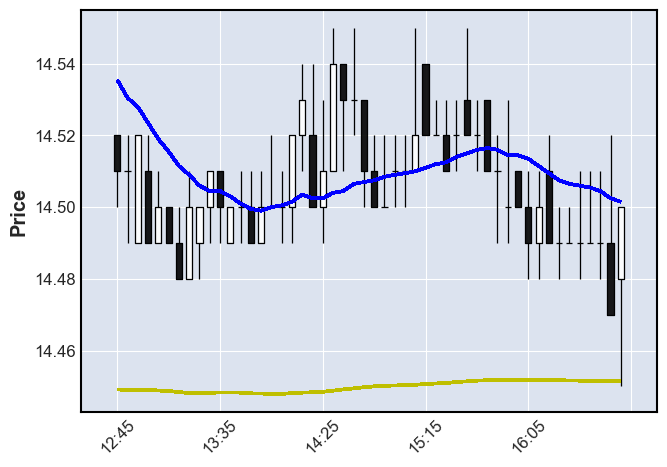

In [40]:
i = 0

mm_rapida_plot = list(ls_dados_ohlc[i][['mm_rapida']].itertuples(index=True))
mm_lenta_plot = list(ls_dados_ohlc[i][['mm_lenta']].itertuples(index=True))

df_figure = ls_dados_ohlc[i].iloc[-50:]
mm_rapida_plot = mm_rapida_plot[-50:]
mm_lenta_plot = mm_lenta_plot[-50:]

mpf.plot(df_figure, type='candle', alines=dict(alines=[mm_rapida_plot, mm_lenta_plot],colors=['b','y']))

In [128]:
ls_dados_ohlc = []

while datetime.now().time() < time(12, 15, 0):
    sleep(1)

while len(ls_dados_ohlc) < len(tickers):
    
    indice_ticker = 0

    for i in tickers:
        dados_ohlc = mt5.copy_rates_range(i, mt5.TIMEFRAME_M5, data_inicio, data_fim)
        dados_ohlc = pd.DataFrame(dados_ohlc)
        dados_ohlc['ticker'] = str(i)
        dados_ohlc['indice_ticker'] = indice_ticker
        indice_ticker += 1
        dados_ohlc.index = pd.to_datetime(dados_ohlc['time'], unit='s')
        dados_ohlc = dados_ohlc.drop('time', axis=1)

        medias_moveis(dados_ohlc)

        if screnning_abertura(dados_ohlc):
            print(dados_ohlc.indice_ticker[0], dados_ohlc.ticker[0])

        ls_dados_ohlc.append(dados_ohlc)

2 ALSO3
3 ARZZ3
5 AZUL4
6 B3SA3
7 BBAS3
12 BPAC11
19 CMIG4
22 CPFE3
25 CSAN3
27 CVCB3
28 CYRE3
30 EGIE3
31 ELET3
32 ELET6
34 ENBR3
37 EQTL3
38 EZTC3
39 FLRY3
42 GOLL4
43 HAPV3
47 ITSA4
58 PCAR3
61 PETZ3
65 RAIZ4
66 RDOR3
67 RENT3
70 SBSP3
72 SMTO3
73 SOMA3
75 TAEE11
76 TIMS3
78 UGPA3
81 VBBR3
83 VIVT3
85 YDUQ3
